<a href="https://colab.research.google.com/github/DataDoggo215/Predicting_BitcoinPrices/blob/main/BitPredict_time_series_forecastng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://finance.yahoo.com/quote/BTC-USD/. I downloaded the price data and uploaded it to my google drive in a csv format.

#Exploratory Data Analysis

In [1]:
#Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Import with pandas
import pandas as pd 
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('/content/gdrive/My Drive/BTC_prices.csv',
                 parse_dates=["Date"],
                 index_col=["Date"]) # prase the date column and tell pandas column 1 is a datetime 

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-15,22196.730469,22642.671875,20178.376953,22572.839844,22572.839844,54912007015
2022-06-16,22576.304688,22868.921875,20265.226563,20381.650391,20381.650391,31183975654
2022-06-17,20385.718750,21243.312500,20326.519531,20471.482422,20471.482422,27132421514
2022-06-18,20473.425781,20736.041016,17708.623047,19017.642578,19017.642578,42009436760
2022-06-19,18936.421875,20573.923828,18085.064453,20388.425781,20388.425781,37105582080


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2833 entries, 2014-09-17 to 2022-06-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2833 non-null   float64
 1   High       2833 non-null   float64
 2   Low        2833 non-null   float64
 3   Close      2833 non-null   float64
 4   Adj Close  2833 non-null   float64
 5   Volume     2833 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 154.9 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2833 entries, 2014-09-17 to 2022-06-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2833 non-null   float64
 1   High       2833 non-null   float64
 2   Low        2833 non-null   float64
 3   Close      2833 non-null   float64
 4   Adj Close  2833 non-null   float64
 5   Volume     2833 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 154.9 KB


In [8]:
len(df)

2833

In [9]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Adj Close"]).rename(columns={"Adj Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


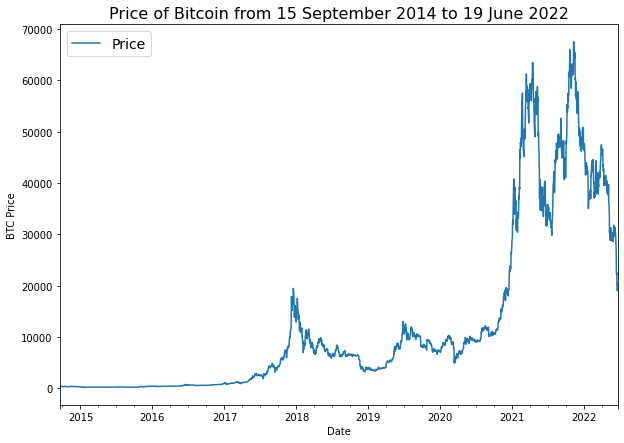

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.legend(fontsize=14);

Importing time series data with Python's CSV module

In [11]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/gdrive/My Drive/BTC_prices.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[5])) # get the adj closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

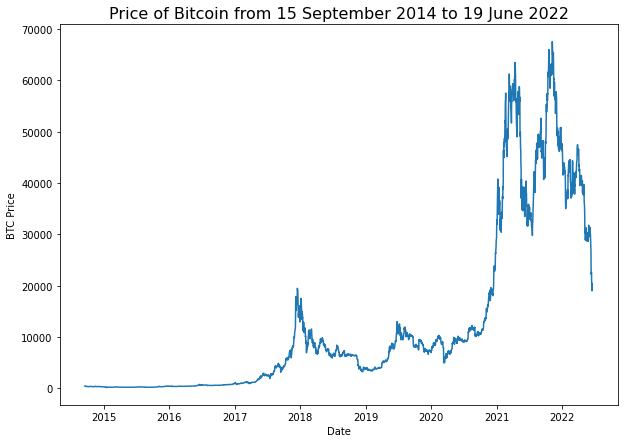

In [12]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.xlabel("Date");

**Format data part 1: Create train and test sets of our time series data**

⚠ Wrong Way to do it!

In [13]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [14]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [15]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2266,), (567,), (2266,), (567,))

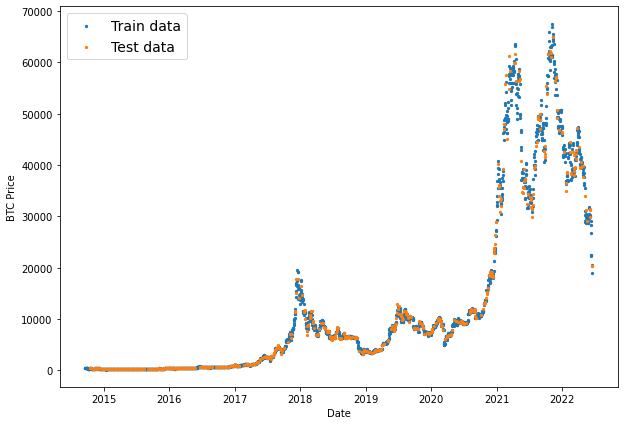

In [16]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

✅ Correct way to do split

In [17]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2266, 567, 2266, 567)

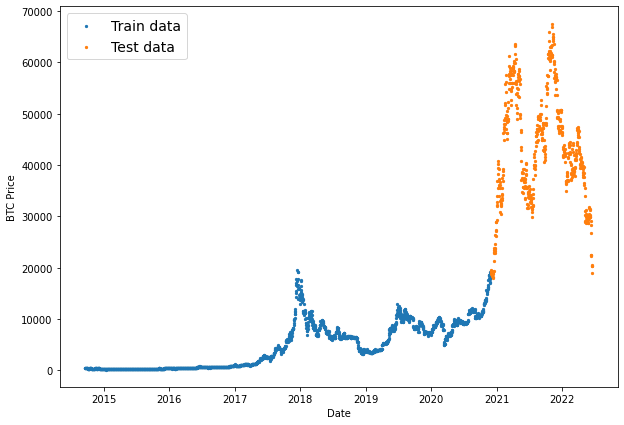

In [18]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Let's create a plotting function so we don't have to do it each time.

In [19]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

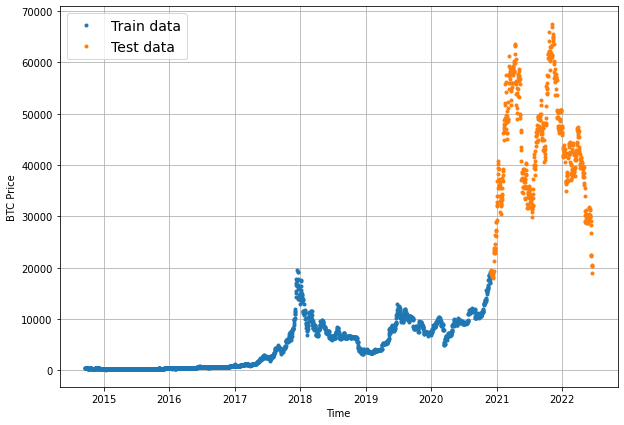

In [20]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Modeling

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Horizon = number of timesteps into the future we're going to predict

Window size = number of timesteps we're going to use to predict horizon

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

Modelling experiments we're running:

*   0 Naïve model (baseline)
*   1 Dense model, horizon = 1, window = 7
*   2 Same as 1, horizon = 1, window = 30
*   3 Same as 1, horizon = 7, window = 30
*   4 Conv1D
*   5 LSTM
*   6 Same as 1 (but with multivariate data)
*   7 N-BEATs Algorithm
*   8 Ensemble (multiple models optimized on different loss functions)
*   9 Future prediction model (model to predict future values)
*   10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

In [21]:
y_test[:10]

array([19625.835938, 18802.998047, 19201.091797, 19445.398438,
       18699.765625, 19154.230469, 19345.121094, 19191.630859,
       18321.144531, 18553.916016])

In [22]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([19625.835938, 18802.998047, 19201.091797, 19445.398438,
        18699.765625, 19154.230469, 19345.121094, 19191.630859,
        18321.144531, 18553.916016]),
 array([30111.998047, 29083.804688, 28360.810547, 26762.648438,
        22487.388672, 22206.792969, 22572.839844, 20381.650391,
        20471.482422, 19017.642578]))

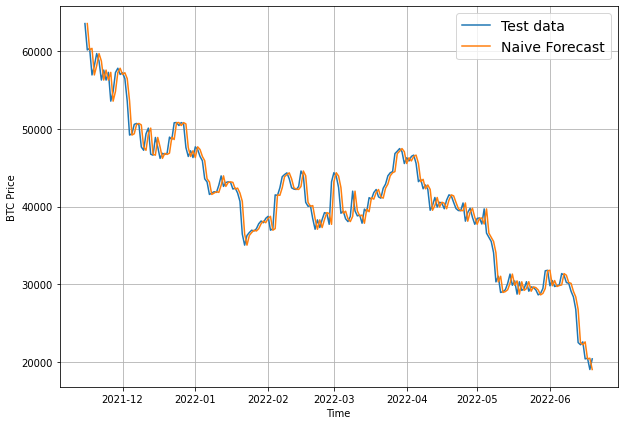

In [23]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

**Time Series Model Evaluation**

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

A few common regression metrics (which can also be used for time series forecasting):

*   MAE - mean absolute error
*   MSE - mean squared error
*   RMSE - root mean square error
*   MAPE/sMAPE - (symmetric) mean absolute percentage error
*   MASE - mean absolute scaled error

In [24]:
import tensorflow as tf

In [25]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [26]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9993991563551445

In [27]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [28]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 1246.1215,
 'mape': 2.9711697,
 'mase': 0.9993992,
 'mse': 2924542.5,
 'rmse': 1710.1294}

In [29]:
naive_forecast[-10:]

array([30111.998047, 29083.804688, 28360.810547, 26762.648438,
       22487.388672, 22206.792969, 22572.839844, 20381.650391,
       20471.482422, 19017.642578])

In [30]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=43144.10296458024>

In [31]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=18058.904297>,
 <tf.Tensor: shape=(), dtype=float64, numpy=67566.828125>)

Resource for other time series forecasting modeling: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

**Creating windows for our dataset**

We window our time series dataset to turn our data into a supervised learning problem.

In [32]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predict this: 423.204987


In [33]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [34]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [35]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We could create a a python loop to create windows for our entire data set, but there are better methods for larger data. To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html. We could also do something similiar with keras: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [36]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [37]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2826, 2826)

In [38]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [39]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [29083.804688 28360.810547 26762.648438 22487.388672 22206.792969
 22572.839844 20381.650391] -> Label: [20471.482422]
Window: [28360.810547 26762.648438 22487.388672 22206.792969 22572.839844
 20381.650391 20471.482422] -> Label: [19017.642578]
Window: [26762.648438 22487.388672 22206.792969 22572.839844 20381.650391
 20471.482422 19017.642578] -> Label: [20388.425781]


**Turning windows into training and test sets**

In [40]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [41]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [42]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2260, 566, 2260, 566)

In [43]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [44]:
test_windows[:5], test_labels[:5]

(array([[19107.464844, 18732.121094, 17150.623047, 17108.402344,
         17717.414063, 18177.484375, 19625.835938],
        [18732.121094, 17150.623047, 17108.402344, 17717.414063,
         18177.484375, 19625.835938, 18802.998047],
        [17150.623047, 17108.402344, 17717.414063, 18177.484375,
         19625.835938, 18802.998047, 19201.091797],
        [17108.402344, 17717.414063, 18177.484375, 19625.835938,
         18802.998047, 19201.091797, 19445.398438],
        [17717.414063, 18177.484375, 19625.835938, 18802.998047,
         19201.091797, 19445.398438, 18699.765625]]), array([[18802.998047],
        [19201.091797],
        [19445.398438],
        [18699.765625],
        [19154.230469]]))

In [45]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [46]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

In [47]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 42ms/step - loss: 1149.3203 - mae: 1149.3203 - mse: 3872267.7500 - val_loss: 5696.1704 - val_mae: 5696.1704 - val_mse: 42395560.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 345.1530 - mae: 345.1530 - mse: 386231.9688 - val_loss: 2417.4836 - val_mae: 2417.4836 - val_mse: 9639312.0000
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 255.1814 - mae: 255.1814 - mse: 247506.7812 - val_loss: 2299.1553 - val_mae: 2299.1553 - val_mse: 8825348.0000
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 225.8822 - mae: 225.8822 - mse: 206915.0938 - val_loss: 2006.2776 - val_mae: 2006.2776 - val_mse: 6803272.5000
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 213.8896 - mae: 213.8896 - mse: 190623.3594 - val_loss: 1938.6223 - val_mae: 1938.6223 - val_mse: 6280098.5000
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - los

In [48]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1259.2498 - mae: 1259.2498 - mse: 2996238.2500


[1259.249755859375, 1259.249755859375, 2996238.25]

In [49]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1255.9602 - mae: 1255.9602 - mse: 2982361.7500


[1255.960205078125, 1255.960205078125, 2982361.75]

**Making forecasts with a model (on the test dataset)**

In [50]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [51]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

(566, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([19409.059, 19055.312, 19201.576, 19430.521, 18922.668, 19027.36 ,
        19357.93 , 19269.12 , 18435.736, 18521.18 ], dtype=float32)>)

In [52]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([566]), TensorShape([566]))

In [53]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1255.9602,
 'mape': 2.9952471,
 'mase': 1.0072899,
 'mse': 2982361.8,
 'rmse': 1726.9515}

In [54]:
naive_results

{'mae': 1246.1215,
 'mape': 2.9711697,
 'mase': 0.9993992,
 'mse': 2924542.5,
 'rmse': 1710.1294}

In [55]:
test_labels.shape

(566, 1)

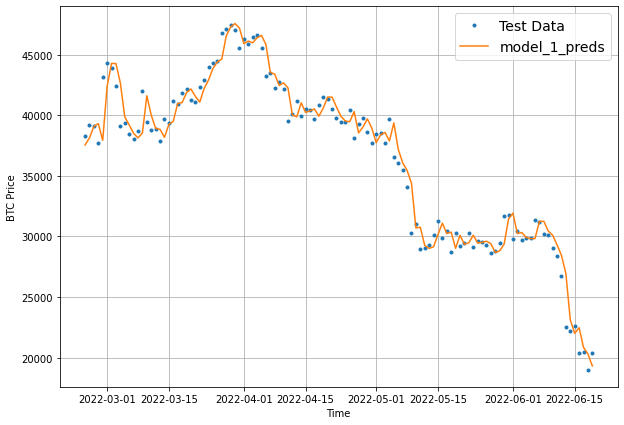

In [56]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [57]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [58]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2803, 2803)

In [59]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2242, 561, 2242, 561)

In [60]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [61]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2176.5083


2176.50830078125

In [62]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1360.1798


1360.1798095703125

In [63]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [64]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([561]), TensorShape([561]))

In [65]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1360.1798,
 'mape': 3.2293282,
 'mase': 1.0843511,
 'mse': 3318696.0,
 'rmse': 1821.7289}

In [66]:
model_1_results

{'mae': 1255.9602,
 'mape': 2.9952471,
 'mase': 1.0072899,
 'mse': 2982361.8,
 'rmse': 1726.9515}

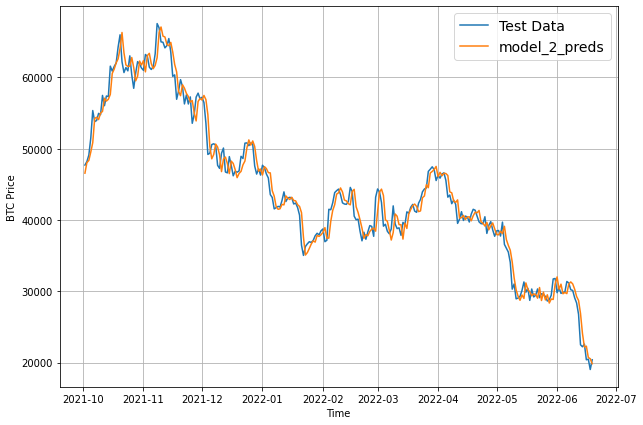

In [67]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [68]:
prices[:10]

array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985, 423.204987, 411.574005, 404.424988])

In [69]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2797, 2797)

In [70]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2237, 560, 2237, 560)

In [71]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [72]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2694.9912


2694.9912109375

In [73]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2675.1331


2675.133056640625

In [74]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[18941.516, 18430.855, 18794.057, 19445.338, 19199.898, 19224.63 ,
        18435.121],
       [19045.574, 19023.236, 19040.678, 19301.986, 19175.209, 19125.   ,
        19036.178],
       [19272.97 , 19511.975, 19281.492, 19495.115, 19529.88 , 19434.66 ,
        19624.74 ],
       [19445.074, 19327.725, 19202.334, 19904.379, 19748.428, 19503.137,
        19652.225],
       [18872.379, 18806.213, 18796.227, 19282.43 , 19059.69 , 18997.883,
        18927.5  ]], dtype=float32)>

In [75]:
model_2_results

{'mae': 1360.1798,
 'mape': 3.2293282,
 'mase': 1.0843511,
 'mse': 3318696.0,
 'rmse': 1821.7289}

In [76]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([560, 7]), TensorShape([561]), TensorShape([566]))

In [77]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  461.19086,   288.27484,   540.6403 ,   791.15344,   612.10126,
          649.596  ,   691.99664,   612.4222 ,   425.50446,   802.7606 ,
         1578.8279 ,  2702.3792 ,  3082.6216 ,  3101.2344 ,  3234.807  ,
         3525.4827 ,  2680.4568 ,  1398.1766 ,   668.8024 ,   794.0064 ,
         1135.1467 ,  1435.9182 ,  1718.7955 ,  2819.0776 ,  3255.4065 ,
         3020.6895 ,  2583.6802 ,  2620.2126 ,  2882.9036 ,  3513.6492 ,
         3513.2913 ,  4329.296  ,  5361.496  ,  4567.251  ,  4357.9272 ,
         4678.2017 ,  3898.3533 ,  2825.9028 ,  2405.856  ,  3678.053  ,
         5088.7964 ,  4462.9224 ,  2120.4614 ,  1441.12   ,  1278.4286 ,
         2895.0066 ,  3718.5286 ,  3518.482  ,  3083.2437 ,  3076.8894 ,
         3044.5784 ,  3646.892  ,  1111.0996 ,  1119.5929 ,  1281.4822 ,
         1263.4453 ,  1764.3767 ,  2259.6587 ,  4019.819  ,  3253.7305 ,
         2367.381  ,  2660.4604 ,  3420.5754 ,  5570.9775 ,  5507.969  ,
         5038.3467 ,  5794.482  ,  6373.015 

**Make our evaluation function work for larger horizons**

In [78]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2675.1331


2675.133056640625

In [79]:
tf.reduce_mean(model_3_results["mae"]).numpy()

2675.1333

In [80]:
model_2_results["mae"].ndim

0

In [81]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [82]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 2675.1333,
 'mape': 6.3782687,
 'mase': 2.1365283,
 'mse': 12918469.0,
 'rmse': 3062.9346}

In [83]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[18941.516, 18430.855, 18794.057, 19445.338, 19199.898, 19224.63 ,
        18435.121],
       [19045.574, 19023.236, 19040.678, 19301.986, 19175.209, 19125.   ,
        19036.178],
       [19272.97 , 19511.975, 19281.492, 19495.115, 19529.88 , 19434.66 ,
        19624.74 ],
       [19445.074, 19327.725, 19202.334, 19904.379, 19748.428, 19503.137,
        19652.225],
       [18872.379, 18806.213, 18796.227, 19282.43 , 19059.69 , 18997.883,
        18927.5  ]], dtype=float32)>

In [84]:
test_labels[:]

array([[18802.998047, 19201.091797, 19445.398438, ..., 19154.230469,
        19345.121094, 19191.630859],
       [19201.091797, 19445.398438, 18699.765625, ..., 19345.121094,
        19191.630859, 18321.144531],
       [19445.398438, 18699.765625, 19154.230469, ..., 19191.630859,
        18321.144531, 18553.916016],
       ...,
       [28360.810547, 26762.648438, 22487.388672, ..., 22572.839844,
        20381.650391, 20471.482422],
       [26762.648438, 22487.388672, 22206.792969, ..., 20381.650391,
        20471.482422, 19017.642578],
       [22487.388672, 22206.792969, 22572.839844, ..., 20471.482422,
        19017.642578, 20388.425781]])

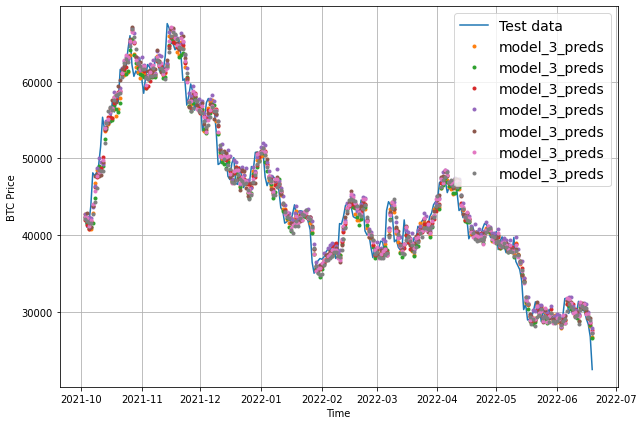

In [85]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [86]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([18941.516, 18430.855, 18794.057, 19445.338, 19199.898, 19224.63 ,
       18435.121], dtype=float32)>

In [87]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=18924.488>

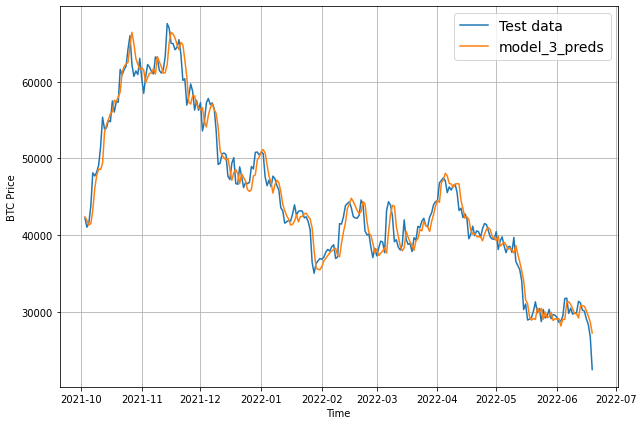

In [88]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

**Which model is performing the best?**

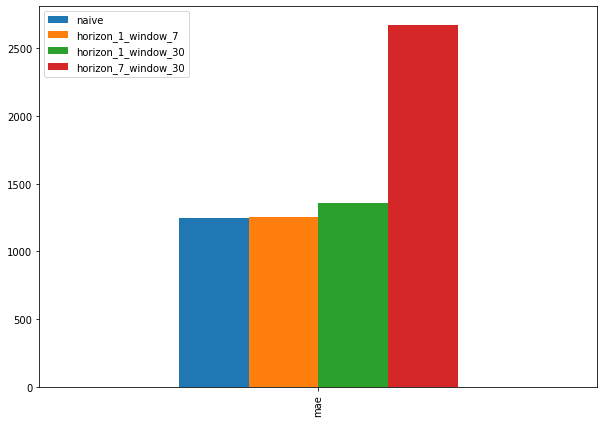

In [89]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


Naive so far seems to be doing the best. This could be due to the pressence of autocorrelation in the data.  For more on how autocorrelation influences a model's predictions, see the article: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [90]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [91]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2826, 2826)

In [92]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2260, 2260, 566, 566)

In [93]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)...

However our data isn't in that shape yet...

In [94]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [95]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [96]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [97]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 10s 56ms/step - loss: 1806.0391 - val_loss: 5662.0327
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 460.1842 - val_loss: 2714.2751
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 255.2370 - val_loss: 2154.8252
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 236.4958 - val_loss: 2126.1233
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 231.3031 - val_loss: 2095.8391
Epoch 6/100
18/18 [==============================] - 1s 37ms/step - loss: 225.7359 - val_loss: 2053.4475
Epoch 7/100
18/18 [==============================] - 1s 36ms/step - loss: 224.0069 - val_loss: 2050.8506
Epoch 8/100
18/18 [==============================] - 1s 36ms/step - loss: 221.1112 - val_loss: 2013.6962
Epoch 9/100
18/18 [==============================] - 1s 36ms/step - loss: 216.6994 - val_loss: 1974.8223
Epoch 10/100
18/18 [==============================] -

In [98]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1257.2462


1257.2462158203125

In [100]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1257.2462


1257.2462158203125

In [101]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19378.855, 19042.062, 19172.516, 19448.906, 18883.236, 19049.941,
       19347.477, 19242.877, 18478.836, 18515.436], dtype=float32)>

In [102]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 1257.2463,
 'mape': 2.9980438,
 'mase': 1.0083214,
 'mse': 2985614.2,
 'rmse': 1727.893}

##Model 5: RNN (LSTM)

In [103]:
train_windows[:5]

array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985],
       [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
        435.790985, 423.204987],
       [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
        423.204987, 411.574005],
       [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
        411.574005, 404.424988],
       [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
        404.424988, 399.519989]])

In [104]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 3878.7314 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 122ms/step - loss: 3505.9561 - val_loss: 21270.4180
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1655.4240INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 1226.3021 - val_loss: 2301.7158
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 382.7728INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 338.4432 - val_loss: 2280.3523
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 261.9571INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 247.5270 - val_loss: 2146.6631
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 224.8230INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 228.2141 - val_loss: 2123.7139
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 227.7180INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 224.8843 - val_loss: 2066.4070
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 212.0397INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 222.7957 - val_loss: 2062.1062
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 228.8148INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 222.5211 - val_loss: 2051.1006
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 220.8364 - val_loss: 2076.2720
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 224.6711INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 219.4214 - val_loss: 2008.6736
Epoch 11/100
 9/18 [==============>...............] - ETA: 0s - loss: 220.3754INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 217.3427 - val_loss: 1993.2977
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 215.3659 - val_loss: 2023.2374
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 213.6219INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 214.0644 - val_loss: 1964.3619
Epoch 14/100
11/18 [=================>............] - ETA: 0s - loss: 230.4644INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 211.7940 - val_loss: 1959.8608
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 206.5002INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 211.1402 - val_loss: 1950.5966
Epoch 16/100
10/18 [===============>..............] - ETA: 0s - loss: 208.4695INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 208.0957 - val_loss: 1929.3373
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 206.2462INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 206.2462 - val_loss: 1894.7213
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 201.3631INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 201.7825 - val_loss: 1754.9586
Epoch 19/100
12/18 [===================>..........] - ETA: 0s - loss: 188.8658INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 193.4353 - val_loss: 1741.7531
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 198.7726 - val_loss: 1916.4960
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 200.8071 - val_loss: 1852.1531
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 196.9664 - val_loss: 1820.9507
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 195.5108 - val_loss: 1818.8514
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 193.8208 - val_loss: 1783.5645
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 193.2662 - val_loss: 1772.7094
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 188.8756 - val_loss: 1748.2600
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 192.9706INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 188.7209 - val_loss: 1730.2434
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 189.5014INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 185.1029 - val_loss: 1725.1056
Epoch 29/100
11/18 [=================>............] - ETA: 0s - loss: 181.0654INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 183.0662 - val_loss: 1696.6295
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 181.2615INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 180.2352 - val_loss: 1684.5240
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 174.2421INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 179.0302 - val_loss: 1666.0388
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 178.5433 - val_loss: 1676.8529
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 180.8636INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 179.6431 - val_loss: 1650.4915
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 173.2186INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 174.2381 - val_loss: 1620.1648
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 163.7505INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 171.7460 - val_loss: 1605.2473
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 173.5951INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 171.1646 - val_loss: 1596.5341
Epoch 37/100
11/18 [=================>............] - ETA: 0s - loss: 167.5774INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 168.6879 - val_loss: 1582.9315
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 168.3076INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 168.8449 - val_loss: 1565.7291
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 168.5823 - val_loss: 1611.0396
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 179.3416 - val_loss: 1595.0828
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 169.3512 - val_loss: 1590.8853
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 167.2526 - val_loss: 1567.5980
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 167.5969INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 166.5179 - val_loss: 1552.1648
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 180.3910 - val_loss: 1727.6671
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 183.4704 - val_loss: 1630.5306
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 175.1209 - val_loss: 1615.6558
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 172.4455 - val_loss: 1608.9706
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 170.5191 - val_loss: 1587.3862
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 169.2304 - val_loss: 1576.8545
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 168.0946 - val_loss: 1584.3167
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 167.1432 - val_loss: 1580.7064
Epoch 52/100
11/18 [=================>............] - ETA: 0s - los

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 164.7597 - val_loss: 1539.0422
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 165.2359 - val_loss: 1543.5289
Epoch 54/100
10/18 [===============>..............] - ETA: 0s - loss: 160.5633INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 162.6694 - val_loss: 1515.9220
Epoch 55/100
11/18 [=================>............] - ETA: 0s - loss: 170.2342INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 164.1939 - val_loss: 1504.9896
Epoch 56/100
12/18 [===================>..........] - ETA: 0s - loss: 151.4593INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 160.8875 - val_loss: 1502.9431
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 159.0438 - val_loss: 1527.9374
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 161.9298 - val_loss: 1509.2286
Epoch 59/100
12/18 [===================>..........] - ETA: 0s - loss: 162.4337INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 161.1827 - val_loss: 1478.4288
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 159.4302 - val_loss: 1490.9799
Epoch 61/100
12/18 [===================>..........] - ETA: 0s - loss: 147.5492INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 157.0473 - val_loss: 1457.2732
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 151.6093INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 153.8200 - val_loss: 1452.0422
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 154.7028 - val_loss: 1495.2637
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 153.5877 - val_loss: 1460.7095
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 162.7952INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 156.5450 - val_loss: 1451.9443
Epoch 66/100
11/18 [=================>............] - ETA: 0s - loss: 157.0390INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 156.6395 - val_loss: 1428.8066
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 151.0193 - val_loss: 1438.8937
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 152.5113INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 151.0655 - val_loss: 1417.7017
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 151.5179 - val_loss: 1419.1548
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 151.3388 - val_loss: 1417.9427
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 152.6773 - val_loss: 1435.7633
Epoch 72/100
11/18 [=================>............] - ETA: 0s - loss: 152.8600INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 153ms/step - loss: 150.2258 - val_loss: 1407.6819
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 150.0003 - val_loss: 1421.6666
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 151.7956 - val_loss: 1475.9761
Epoch 75/100
12/18 [===================>..........] - ETA: 0s - loss: 152.3233INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 152.4107 - val_loss: 1390.8300
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 152.1177 - val_loss: 1624.4747
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 157.0266 - val_loss: 1392.6024
Epoch 78/100
12/18 [===================>..........] - ETA: 0s - loss: 155.7403INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 148.9342 - val_loss: 1384.0703
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 139.9304INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 147.1449 - val_loss: 1381.7100
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 148.1542 - val_loss: 1383.8240
Epoch 81/100
12/18 [===================>..........] - ETA: 0s - loss: 150.2168INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 146.8521 - val_loss: 1376.3344
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 148.9442 - val_loss: 1405.1543
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 146.7731 - val_loss: 1376.4187
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 146.6905 - val_loss: 1376.9990
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 146.3420 - val_loss: 1378.5822
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 147.1805 - val_loss: 1379.8813
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 148.1335 - val_loss: 1378.7202
Epoch 88/100
11/18 [=================>............] - ETA: 0s - loss: 154.3758INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 148.7581 - val_loss: 1361.8295
Epoch 89/100
12/18 [===================>..........] - ETA: 0s - loss: 147.7817INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 145.1271 - val_loss: 1358.9816
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 144.7094 - val_loss: 1365.6738
Epoch 91/100
13/18 [====================>.........] - ETA: 0s - loss: 150.5293INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 144.6546 - val_loss: 1355.5656
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 145.5157 - val_loss: 1381.3890
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 143.6223 - val_loss: 1357.7189
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 144.7914 - val_loss: 1361.6710
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 145.7528INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 145.1184 - val_loss: 1349.9497
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 144.1897 - val_loss: 1353.7506
Epoch 97/100
10/18 [===============>..............] - ETA: 0s - loss: 155.7529INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 146.6385 - val_loss: 1346.9091
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 143.9709 - val_loss: 1368.8594
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 143.8608 - val_loss: 1347.6766
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 143.6625 - val_loss: 1356.8149


In [105]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1346.9091


1346.9090576171875

In [106]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18993.123, 19178.055, 19281.951, 19485.338, 19153.365],
      dtype=float32)>

In [107]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 1346.909,
 'mape': 3.2111578,
 'mase': 1.0802317,
 'mse': 3288358.5,
 'rmse': 1813.3832}

## Model 6: Dense (multivariate time series)

We could try adding in new features to see how it affects our prediction. Let's take a look at bitcoin halving events: https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [108]:
# Let's make a multivariate time series 
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [109]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset range (our data starts from 15 September 2014)
block_reward_2 = 25 # 8 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [110]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [111]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [112]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


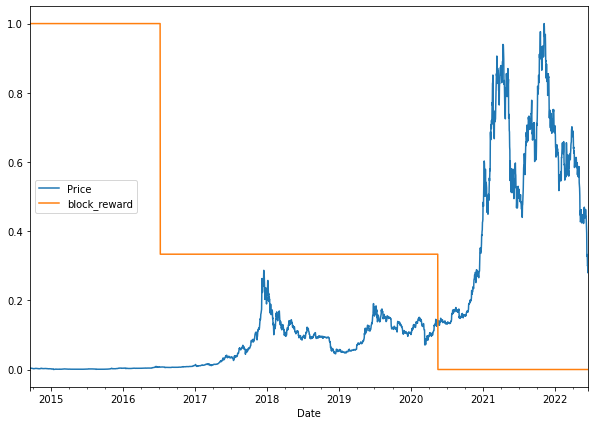

In [113]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [114]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [115]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [116]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-06-15,22572.839844,6.25,22206.792969,22487.388672,26762.648438,28360.810547,29083.804688,30111.998047,30214.355469
2022-06-16,20381.650391,6.25,22572.839844,22206.792969,22487.388672,26762.648438,28360.810547,29083.804688,30111.998047
2022-06-17,20471.482422,6.25,20381.650391,22572.839844,22206.792969,22487.388672,26762.648438,28360.810547,29083.804688
2022-06-18,19017.642578,6.25,20471.482422,20381.650391,22572.839844,22206.792969,22487.388672,26762.648438,28360.810547
2022-06-19,20388.425781,6.25,19017.642578,20471.482422,20381.650391,22572.839844,22206.792969,22487.388672,26762.648438


In [117]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [118]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [119]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2260, 2260, 566, 566)

In [120]:

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                          
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 5s - loss: 4008.0112INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 30ms/step - loss: 1847.7153 - val_loss: 4992.1792
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 459.4840INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 499.3842 - val_loss: 3306.7439
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 299.5707INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 295.1064 - val_loss: 2464.1560
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 254.5420INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 273.4439 - val_loss: 2429.2844
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 261.6751INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 266.1107 - val_loss: 2401.3032
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 272.7063INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 260.5256 - val_loss: 2300.7488
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 224.8819INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 247.7446 - val_loss: 2239.5190
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 272.3154INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 241.5420 - val_loss: 2179.2493
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 193.9285INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 234.2486 - val_loss: 2146.4036
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 192.1732INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 227.6938 - val_loss: 2039.7216
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 222.2348INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 219.0729 - val_loss: 2025.5568
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 203.0327INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 212.5259 - val_loss: 1896.3580
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 203.5011INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 203.1135 - val_loss: 1836.7194
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 236.8348INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 196.1691 - val_loss: 1784.1522
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 208.5973INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 187.3152 - val_loss: 1732.6266
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 162.6947INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 184.0246 - val_loss: 1635.6417
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 153.2911INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 174.3837 - val_loss: 1600.3872
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 181.0944INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 168.6981 - val_loss: 1551.1360
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 168.5437 - val_loss: 1551.3849
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 165.6203INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 162.4597 - val_loss: 1499.8002
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 160.1830 - val_loss: 1511.7158
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 119.3807INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 158.5152 - val_loss: 1449.7405
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 154.0368INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 154.0368 - val_loss: 1443.1187
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 171.2601INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 152.8096 - val_loss: 1425.9955
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 135.2412INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 154.9879 - val_loss: 1412.7958
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 152.4924 - val_loss: 1492.7234
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 154.8088 - val_loss: 1497.4628
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 135.4659INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 152.1857 - val_loss: 1387.6808
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 155.3185 - val_loss: 1494.2515
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 157.9693 - val_loss: 1413.6426
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 146.0464 - val_loss: 1416.1040
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 145.8873 - val_loss: 1482.5277
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 156.4431INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 147.6528 - val_loss: 1334.5660
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 142.4052 - val_loss: 1336.0574
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 143.8421 - val_loss: 1371.9082
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 152.5769INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 142.5296 - val_loss: 1318.6920
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4413INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 145.4509 - val_loss: 1314.5193
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2885INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 142.5939 - val_loss: 1310.5747
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 151.8503 - val_loss: 1461.1337
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 143.7015INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 152.7193 - val_loss: 1303.9210
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 153.1534INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 141.9634 - val_loss: 1300.7692
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 100.8112INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 138.2765 - val_loss: 1297.4774
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 137.5214 - val_loss: 1346.7294
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 139.0378 - val_loss: 1402.1150
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 138.1676 - val_loss: 1311.0515
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 141.1696 - val_loss: 1539.0492
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 166.6726INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 144.2034 - val_loss: 1295.0686
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 171.7906INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 137.7261 - val_loss: 1281.6652
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 144.7311 - val_loss: 1428.0970
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 162.0452 - val_loss: 1363.1261
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 142.2845 - val_loss: 1288.0237
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 108.2117INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 139.6179 - val_loss: 1276.4105
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 145.3036 - val_loss: 1280.8730
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5014INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 135.6492 - val_loss: 1272.5896
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 144.5261INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 138.4554 - val_loss: 1271.5939
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 137.2410 - val_loss: 1283.5735
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 139.3648 - val_loss: 1278.8701
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 137.6744 - val_loss: 1356.1753
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 142.2932 - val_loss: 1375.8900
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 141.8509 - val_loss: 1354.8804
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 102.0031INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 137.2558 - val_loss: 1265.7411
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 134.6797 - val_loss: 1269.5538
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 139.1735 - val_loss: 1358.9077
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 138.2922 - val_loss: 1326.5157
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 138.2714 - val_loss: 1300.0214
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 140.3974 - val_loss: 1319.0603
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 139.6235 - val_loss: 1316.6702
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5426INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 136.3883 - val_loss: 1263.0425
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 122.2992INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 135.0863 - val_loss: 1261.0859
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 136.2229 - val_loss: 1265.4012
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 159.3841INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 137.5374 - val_loss: 1260.4971
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 137.5780 - val_loss: 1273.7032
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 135.6124 - val_loss: 1261.1046
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 136.3711 - val_loss: 1265.8217
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 134.7797 - val_loss: 1265.7174
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 133.9497 - val_loss: 1363.7435
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9133INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 140.3779 - val_loss: 1258.7438
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 139.9680 - val_loss: 1259.6831
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 134.4965 - val_loss: 1264.3384
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 134.3667 - val_loss: 1296.2946
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 139.0452 - val_loss: 1259.6228
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 142.6099INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 136.3965 - val_loss: 1257.4694
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 133.7298 - val_loss: 1276.4025
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 102.6230INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 133.7625 - val_loss: 1256.6644
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 137.9186 - val_loss: 1337.6323
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 134.0971INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 141.6573 - val_loss: 1256.1841
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 134.3130 - val_loss: 1260.9177
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 134.2256 - val_loss: 1262.7535
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 133.5860 - val_loss: 1278.2454
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 139.0038 - val_loss: 1256.4520
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 137.6079 - val_loss: 1363.5293
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 136.5053 - val_loss: 1412.6260
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 135.7253 - val_loss: 1259.9867
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 133.8226 - val_loss: 1279.7144
Epoch 95/100
18/18 [==============================] - 0s 4ms/step -

In [121]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1265.3374


1265.33740234375

In [122]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1256.1842


1256.1842041015625

In [123]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19418.16 , 19023.764, 19168.525, 19511.465, 18813.316, 19025.904,
       19380.314, 19183.154, 18440.879, 18532.156], dtype=float32)>

In [124]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 1256.1841,
 'mape': 2.9937186,
 'mase': 1.0074695,
 'mse': 2962624.8,
 'rmse': 1721.2277}

In [125]:
model_1_results

{'mae': 1255.9602,
 'mape': 2.9952471,
 'mase': 1.0072899,
 'mse': 2982361.8,
 'rmse': 1726.9515}

##Model 7: N-BEATS algorithm

We're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [126]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [127]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [128]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [129]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


We will be following the performance data pipeline in the tensorflow guide: https://www.tensorflow.org/guide/data_performance

In [130]:
HORIZON = 1
WINDOW_SIZE = 7

In [131]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [132]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [133]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2260, 2260, 566, 566)

In [134]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [135]:
# Values from N-BEATS paper: https://arxiv.org/pdf/1905.10437.pdf
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [136]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [137]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 1147: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1535: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1635: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 34s, sys: 7.4 s, total: 4min 42s
Wall time: 5min 36s


In [138]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 1254.2347


1254.2347412109375

In [139]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19429.92 , 18926.777, 19237.37 , 19401.71 , 18878.76 , 19033.268,
       19357.592, 19259.646, 18381.05 , 18519.623], dtype=float32)>

In [140]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 1254.2347,
 'mape': 2.9947736,
 'mase': 1.0059061,
 'mse': 2977649.0,
 'rmse': 1725.5865}

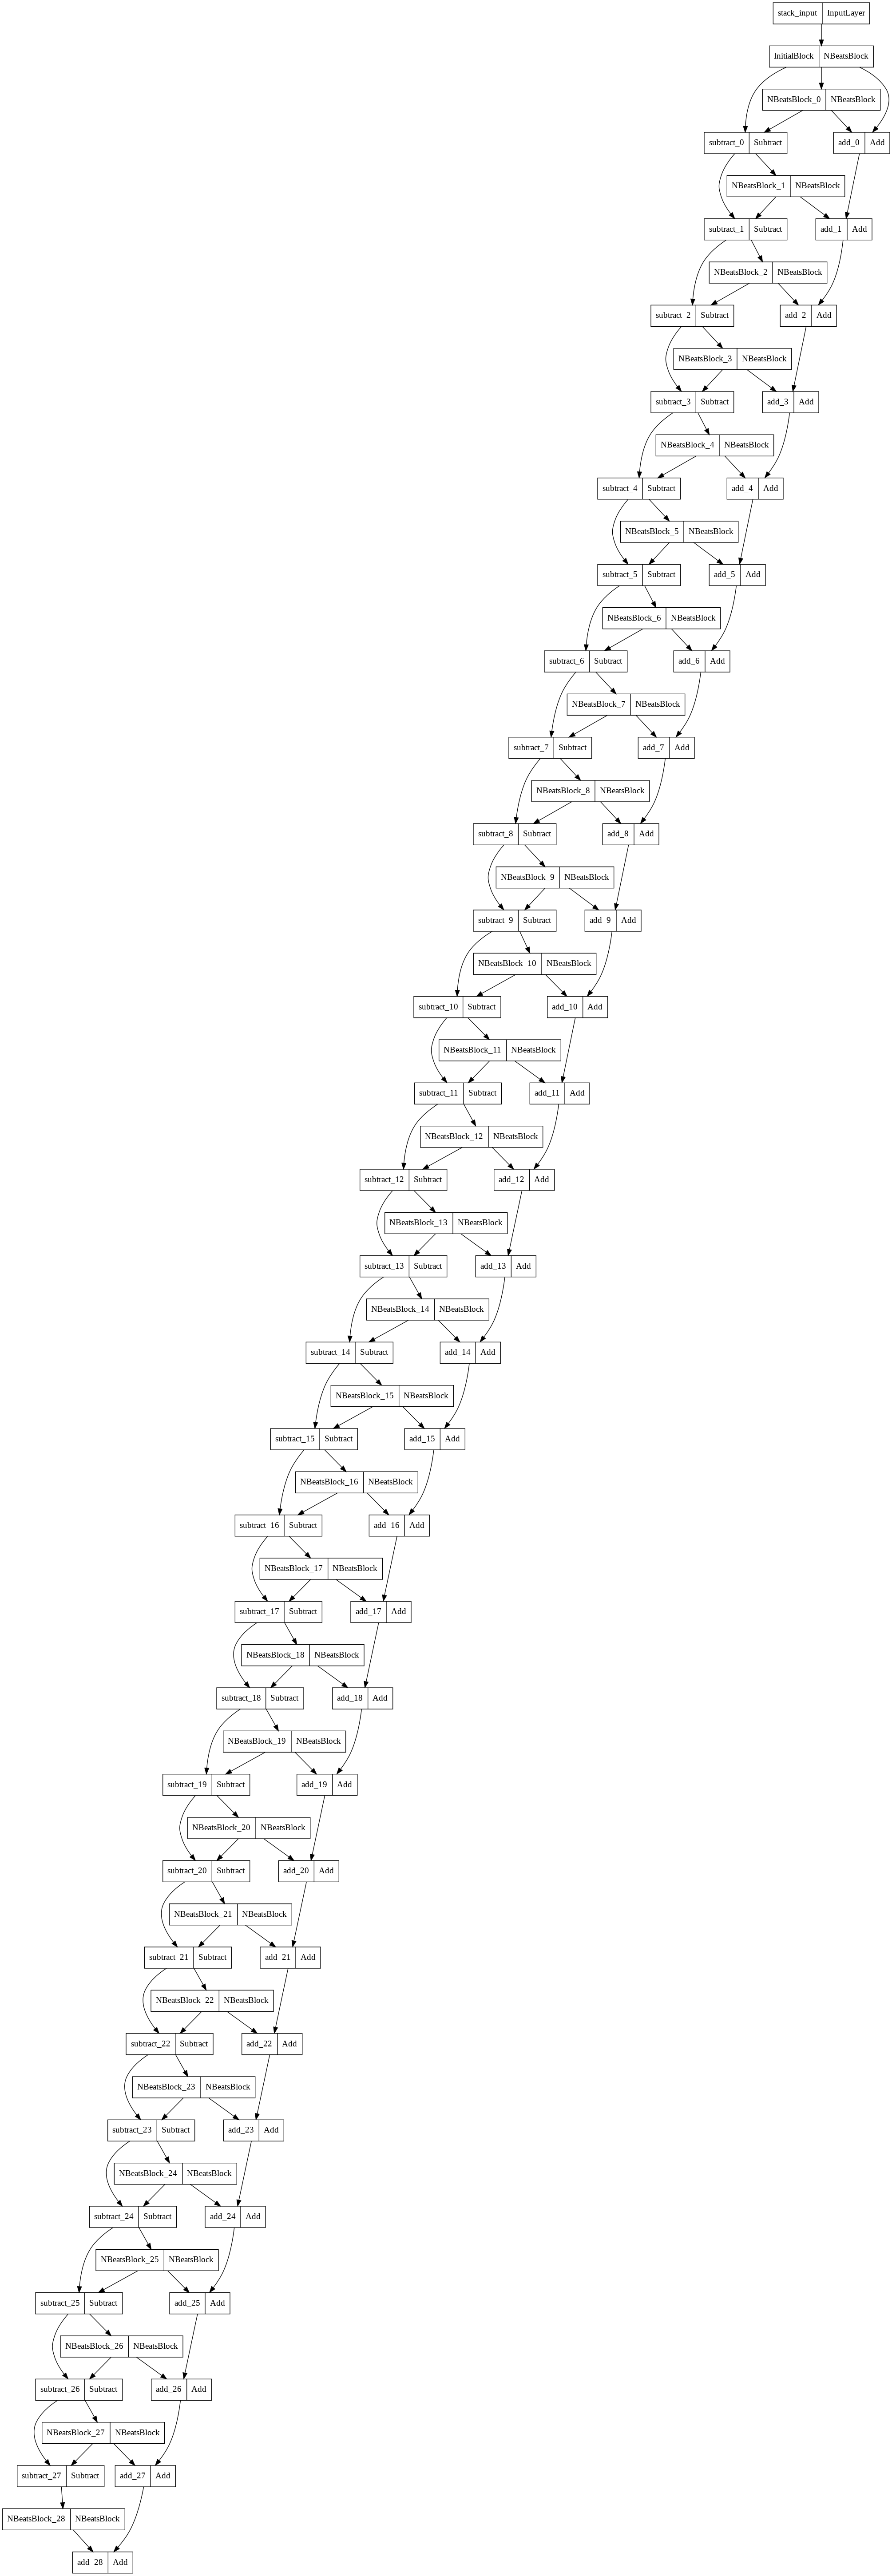

In [141]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [142]:
HORIZON, WINDOW_SIZE

(1, 7)

In [143]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [144]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 418: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 518: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 217: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 331: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 431: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 312: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 412: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 356: ReduceLROnPlateau reduci

In [145]:
ensemble_models

In [146]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [147]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 616 ms, sys: 24.3 ms, total: 641 ms
Wall time: 628 ms


In [148]:
ensemble_preds

<tf.Tensor: shape=(15, 566), dtype=float32, numpy=
array([[19711.648, 18809.844, 19267.088, ..., 21996.72 , 20685.182,
        19096.508],
       [19640.045, 18710.35 , 19277.816, ..., 20986.799, 20520.71 ,
        19553.799],
       [19233.14 , 19014.102, 19302.783, ..., 20275.98 , 20346.75 ,
        18918.957],
       ...,
       [18565.24 , 18920.021, 18637.35 , ..., 20782.027, 20215.512,
        19159.182],
       [19508.74 , 18672.012, 19451.705, ..., 21072.592, 18873.06 ,
        19040.303],
       [19221.602, 18936.2  , 19264.27 , ..., 20359.285, 20425.496,
        18866.389]], dtype=float32)>

In [149]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19299.68 , 18739.943, 19148.43 , 19368.242, 18790.795, 18998.283,
       19321.531, 19187.648, 18284.508, 18484.568], dtype=float32)>

In [150]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([19412.299, 18809.844, 19267.088, 19430.959, 18845.422, 19078.92 ,
       19391.873, 19246.797, 18303.521, 18536.152], dtype=float32)

In [151]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 1254.5399,
 'mape': 2.9934108,
 'mase': 1.0061508,
 'mse': 2962291.2,
 'rmse': 1721.1307}

In [152]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 1246.1812,
 'mape': 2.974869,
 'mase': 0.99944705,
 'mse': 2944607.0,
 'rmse': 1715.9857}

In [153]:
model_1_results

{'mae': 1255.9602,
 'mape': 2.9952471,
 'mase': 1.0072899,
 'mse': 2982361.8,
 'rmse': 1726.9515}

**Plotting the prediction intervals (uncertainty estimates) of our ensemble**

There are two major types of uncertainty in machine learning you should know about:

**Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty

**Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

In [154]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [155]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

In [156]:
X_test.index[:10]

DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

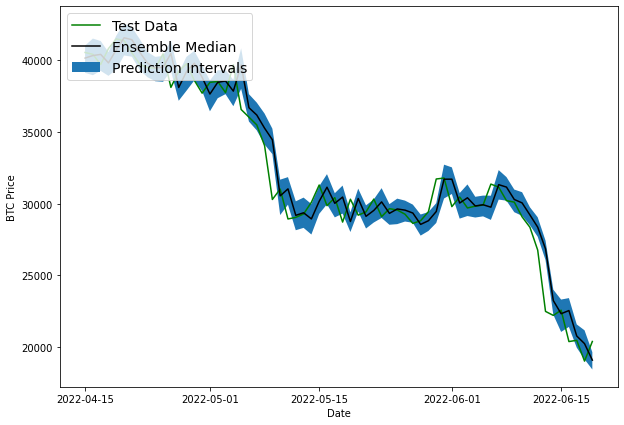

In [157]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

##Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture. Let's now build a model which is capable of predicting into the future!

In [158]:
HORIZON = 1
WINDOW_SIZE = 7

In [159]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [160]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-06-15,22572.839844,6.25,22206.792969,22487.388672,26762.648438,28360.810547,29083.804688,30111.998047,30214.355469
2022-06-16,20381.650391,6.25,22572.839844,22206.792969,22487.388672,26762.648438,28360.810547,29083.804688,30111.998047
2022-06-17,20471.482422,6.25,20381.650391,22572.839844,22206.792969,22487.388672,26762.648438,28360.810547,29083.804688
2022-06-18,19017.642578,6.25,20471.482422,20381.650391,22572.839844,22206.792969,22487.388672,26762.648438,28360.810547
2022-06-19,20388.425781,6.25,19017.642578,20471.482422,20381.650391,22572.839844,22206.792969,22487.388672,26762.648438


In [161]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2826, 2826)

In [162]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [163]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [164]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

**Make predictions into future**

In [166]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

In [167]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [168]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [22487.388672 22206.792969 22572.839844 20381.650391 20471.482422
 19017.642578 20388.425781] -> Prediction: 22342.59375

Predicting on:
 [22206.792969 22572.839844 20381.650391 20471.482422 19017.642578
 20388.425781 22342.59375 ] -> Prediction: 21877.1640625

Predicting on:
 [22572.839844  20381.650391  20471.482422  19017.642578  20388.425781
 22342.59375   21877.1640625] -> Prediction: 21382.955078125

Predicting on:
 [20381.650391   20471.482422   19017.642578   20388.425781
 22342.59375    21877.1640625  21382.95507812] -> Prediction: 19968.033203125

Predicting on:
 [20471.482422   19017.642578   20388.425781   22342.59375
 21877.1640625  21382.95507812 19968.03320312] -> Prediction: 20032.705078125

Predicting on:
 [19017.642578   20388.425781   22342.59375    21877.1640625
 21382.95507812 19968.03320312 20032.70507812] -> Prediction: 19794.05859375

Predicting on:
 [20388.425781   22342.59375    21877.1640625  21382.95507812
 19968.03320312 20032.70507812 19794

In [169]:
future_forecast

[22342.594,
 21877.164,
 21382.955,
 19968.033,
 20032.705,
 19794.059,
 21222.055,
 21927.947,
 21312.139,
 20554.111,
 19834.111,
 20110.81,
 20458.031,
 21407.48]

In [170]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [171]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-06-19 00:00:00')

In [173]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
       '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27',
       '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
       '2022-07-02', '2022-07-03'], dtype='datetime64[D]')

In [174]:
bitcoin_prices.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-06-10', '2022-06-11', '2022-06-12', '2022-06-13',
               '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17',
               '2022-06-18', '2022-06-19'],
              dtype='datetime64[ns]', name='Date', length=2833, freq=None)

In [175]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22',
        '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
        '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
        '2022-07-01', '2022-07-02', '2022-07-03'], dtype='datetime64[D]'),
 array([20388.426, 22342.594, 21877.164, 21382.955, 19968.033, 20032.705,
        19794.059, 21222.055, 21927.947, 21312.139, 20554.111, 19834.111,
        20110.81 , 20458.031, 21407.48 ], dtype=float32))

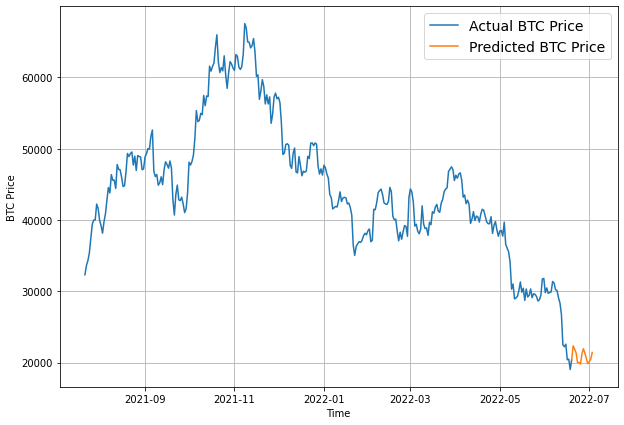

In [176]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Despite the more recent bitcoin price crashes, our model predicts that it will increase and decrease over the next two weeks. Do we believe this? Let's take a look at the turkey problem.

##Model 10: Why forecasting is unreliable (the turkey problem 🦃)

In [179]:
# Let's introduce a turkey prolbem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [178]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[29083.804688,
 28360.810547,
 26762.648438,
 22487.388672,
 22206.792969,
 22572.839844,
 20381.650391,
 20471.482422,
 19017.642578,
 203.88425781]

In [180]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2022-06-10T00:00:00.000000000', '2022-06-11T00:00:00.000000000',
       '2022-06-12T00:00:00.000000000', '2022-06-13T00:00:00.000000000',
       '2022-06-14T00:00:00.000000000', '2022-06-15T00:00:00.000000000',
       '2022-06-16T00:00:00.000000000', '2022-06-17T00:00:00.000000000',
       '2022-06-18T00:00:00.000000000', '2022-06-19T00:00:00.000000000'],
      dtype='datetime64[ns]')

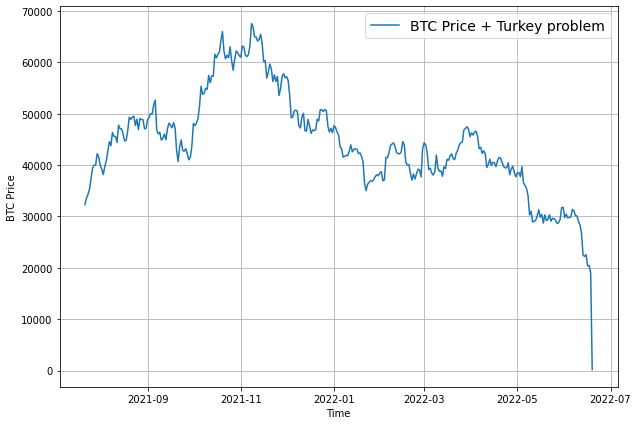

In [181]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [182]:
HORIZON = 1
WINDOW_SIZE = 7

In [183]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2260, 566, 2260, 566)

In [184]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [185]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


In [186]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1388.2313


1388.2313232421875

In [187]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1281.5690


1281.5689697265625

In [188]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19342.23 , 18922.982, 19096.412, 19433.572, 18785.111, 19043.352,
       19307.885, 19193.408, 18396.855, 18444.062], dtype=float32)>

In [189]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 12423.204,
 'mape': 69.0036,
 'mase': 9.722771,
 'mse': 239506430.0,
 'rmse': 14857.47}

In [190]:
model_1_results

{'mae': 1255.9602,
 'mape': 2.9952471,
 'mase': 1.0072899,
 'mse': 2982361.8,
 'rmse': 1726.9515}

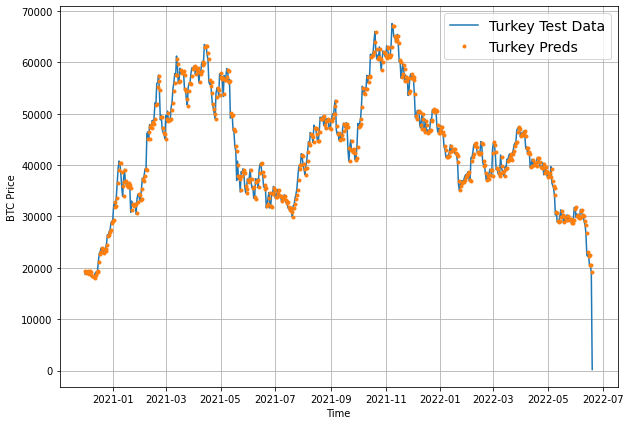

In [191]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

#Model Comparison

In [192]:
ensemble_results

{'mae': 1246.1812,
 'mape': 2.974869,
 'mase': 0.99944705,
 'mse': 2944607.0,
 'rmse': 1715.9857}

In [193]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,1246.121460,2.924542e+06,1710.129395,2.971170,0.999399
model_1_dense_w7_h1,1255.960205,2.982362e+06,1726.951538,2.995247,1.007290
model_2_dense_w30_h1,1360.179810,3.318696e+06,1821.728882,3.229328,1.084351
model_3_dense_w30_h7,2675.133301,1.291847e+07,3062.934570,6.378269,2.136528
model_4_CONV1D,1257.246338,2.985614e+06,1727.892944,2.998044,1.008321
model_5_LSTM,1346.909058,3.288358e+06,1813.383179,3.211158,1.080232
model_6_multivariate,1256.184082,2.962625e+06,1721.227661,2.993719,1.007470
model_7_NBEATS,1254.234741,2.977649e+06,1725.586548,2.994774,1.005906
model_8_ensemble,1246.181152,2.944607e+06,1715.985718,2.974869,0.999447
model_10_turkey,12423.204102,2.395064e+08,14857.469727,69.003601,9.722771


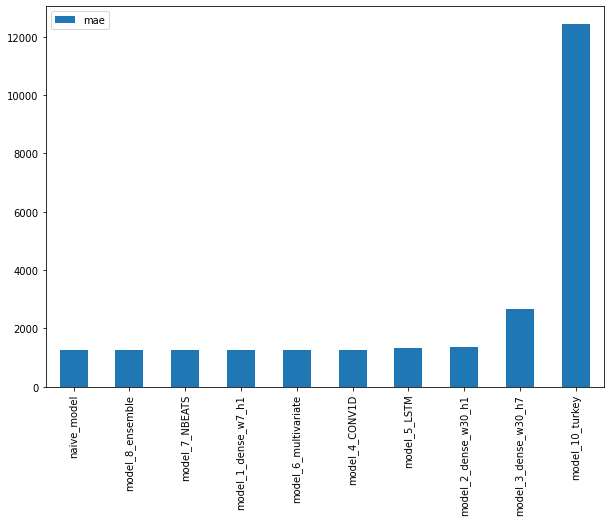

In [194]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");